In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

2023-03-11 15:27:09.618991: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Load and Understand Our Data

In [2]:
EPOCHS = 50
BATCH_SIZE = 32

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
print("X Train shape:", x_train.shape)
print(x_train[0][0][0])
print("Looks like we need to convert in between (0,1) by divide elements by 255 \n")
print("Y Train shape:", y_train.shape)
print(np.unique(y_train))
print("Looks like we have 10 unique classes for our data")

X Train shape: (50000, 32, 32, 3)
[59 62 63]
Looks like we need to convert in between (0,1) by divide elements by 255 

Y Train shape: (50000, 1)
[0 1 2 3 4 5 6 7 8 9]
Looks like we have 10 unique classes for our data


In [5]:
# Convert RGB to decimal in between [0,1] => 255 = 1, 0 = 0
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten our target dataset
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [6]:
# Get number of target classes
k_class = len(np.unique(y_train))
print("Number of Classes:", k_class)

Number of Classes: 10


In [7]:
def plot_acc_and_loss(acc, val_acc, loss, val_loss, epochs_range, model_no):
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.suptitle("{}" .format(model_no))
    plt.savefig('./{}.png' .format(model_no))
    plt.show()

In [8]:
def get_history(fitted_model):
    acc = fitted_model.history['accuracy']
    avg_acc = np.mean(acc)
    val_acc = fitted_model.history['val_accuracy']
    avg_valAcc = np.mean(val_acc)

    loss = fitted_model.history['loss']
    avg_loss = np.mean(loss)
    val_loss = fitted_model.history['val_loss']
    avg_val_loss = np.mean(val_loss)

    print("Average Training accuracy: {:.2f}%".format(avg_acc*100))
    print("Average Validation accuracy: {:.2f}%".format(avg_valAcc*100))
    print("Average Loss: {:.2f}".format(avg_loss))
    print("Average Validation Loss: {:.2f}".format(avg_val_loss))

    return acc, val_acc, loss, val_loss

### Model

In [9]:
from tensorflow.keras import layers,models,optimizers
from tensorflow.keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

#### Model 1

In [10]:
# # Get input dimension
# input_dimension = x_train[0].shape

# # Input layer
# inputs = Input(shape=input_dimension)

# # Convolution layers
# x = Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
# # x = BatchNormalization()(x)
# # x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
# # x = BatchNormalization()(x)
# x = MaxPooling2D((2,2))(x)

# x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
# # x = BatchNormalization()(x)
# # x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
# # x = BatchNormalization()(x)
# x = MaxPooling2D((2,2))(x)

# x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
# # x = BatchNormalization()(x)
# # x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
# # x = BatchNormalization()(x)
# x = MaxPooling2D((2,2))(x)

# # Fully connected layer
# x = Flatten()(x)
# # x = Dropout(0.2)(x)
# x = Dense(1024, activation='relu')(x)
# # x = Dropout(0.2)(x)
# x = Dense(k_class, activation='softmax')(x)

# model = Model(inputs=inputs, outputs=x)

### Callbacks

In [11]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

earlyStop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

callbacks = [earlyStop, learning_rate_reduction]

opt = Adam(lr=0.001)

2023-03-11 15:27:17.148197: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Model 2

In [12]:
# Get input dimension
input_dimension = x_train[0].shape

# Input layer
inputs = Input(shape=input_dimension)

# Convolution layers
x = Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = Dropout(0.5)(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = Dropout(0.5)(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = Dropout(0.5)(x)
x = MaxPooling2D((2,2))(x)

# Fully connected layer
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k_class, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                             

In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

In [15]:
# model_1 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=EPOCHS)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(horizontal_flip=True,
                                    vertical_flip=True,
                                    zoom_range=0.2, shear_range=0.2,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1)

train_generator = data_generator.flow(x_train, y_train, BATCH_SIZE)
val_generator = data_generator.flow(x_test, y_test)


In [19]:
steps_per_epoch = x_train.shape[0] // BATCH_SIZE

fitted_model = model.fit(train_generator, 
                         validation_data=val_generator, 
                         steps_per_epoch=steps_per_epoch,
                         epochs=EPOCHS,
                         callbacks=callbacks)

Epoch 1/50
  39/1562 [..............................] - ETA: 4:05 - loss: 0.7964 - accuracy: 0.7115

Average Training accuracy: 62.93%
Average Validation accuracy: 44.90%
Average Loss: 1.03
Average Validation Loss: 1.56


ValueError: x and y must have same first dimension, but have shapes (50,) and (30,)

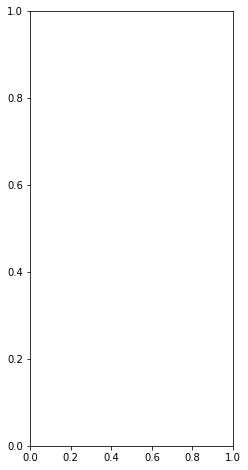

In [18]:
epochs_range = range(EPOCHS)
acc_1, val_acc_1, loss_1, val_loss_1 = get_history(fitted_model)

plot_acc_and_loss(acc_1, val_acc_1, loss_1, val_loss_1, epochs_range, "Model 3")

In [ ]:
model.save_weights("model_3.h5")